In [34]:
import pandas as pd, numpy as np, os
from itertools import product
from sklearn.metrics import f1_score
from scipy.stats import spearmanr
import matplotlib.pyplot as plt  
import seaborn as sns

In [2]:
# Define the datasets and models
datasets = ["covid-lies", "election", "phemerumours", "semeval", "srq", "wtwt"]
models = ["falcon-40b-instruct", "falcon-7b-instruct", "flan-alpaca-gpt4-xl", "flan-alpaca-xxl", "Llama-2-13b-chat-hf", "Mistral-7B-Instruct-v0.1", "flan-ul2", "Llama-2-7b-chat-hf", "Llama-2-7b-hf", "phi-2"]

# Calculate F1 scores for Results
__note__: I am using the 'unweighted' F1 scores and calculating across all three labels (i.e., positive, negative, and neutral). I am also going to store the median in number of words for then raw output as well.

In [39]:
# Initialize an empty dataframe to store F1-scores
f1_scores_df = pd.DataFrame(index=models, columns=pd.MultiIndex.from_product([datasets, ['task_only', 'task_and_definition', 'context_analyze', 'context_question', 'few_shot', 'zero_shot_cot']], names=['dataset', 'column']))
median_words_df = pd.DataFrame(index=models, columns=pd.MultiIndex.from_product([datasets, ['task_only', 'task_and_definition', 'context_analyze', 'context_question', 'few_shot', 'zero_shot_cot']], names=['dataset', 'column']))

In [40]:
# Loop through each dataset and model
for dataset, model in product(datasets, models):
    # Read the CSV file
    file_path = f"results/{dataset}_{model}.csv"
    df = pd.read_csv(file_path)

    # Loop through each column and calculate correlation
    for column, raw_column in zip(['task_only_preds_0', 'task_and_definition_preds_0', 'context_analyze_preds_0', 'context_question_preds_0', 'few_shot_preds_0', 'zero_shot_cot_preds_0'],
                                  ['task_only_preds_raw_0', 'task_and_definition_preds_raw_0', 'context_analyze_preds_raw_0', 'context_question_preds_raw_0', 'few_shot_preds_raw_0', 'zero_shot_cot_preds_raw_0']):
        
        f1 = f1_score(df['stance'], df[column], average='macro')
        f1_scores_df.loc[model, (dataset, column.split('_preds')[0])] = f1
        
        median_words_raw = df[raw_column].apply(lambda x: len(str(x).strip().split()))
        median_words_df.loc[model, (dataset, column.split('_preds')[0])]  = median_words_raw.median()


In [41]:
f1_scores_df

dataset                  covid-lies                                      \
column                    task_only task_and_definition context_analyze   
falcon-40b-instruct        0.173583            0.193632        0.227837   
falcon-7b-instruct         0.322796            0.313146        0.135709   
flan-alpaca-gpt4-xl         0.17432            0.174712        0.325695   
flan-alpaca-xxl            0.224403            0.213224        0.356435   
Llama-2-13b-chat-hf        0.266382            0.208784        0.326097   
Mistral-7B-Instruct-v0.1    0.22662            0.283472        0.417769   
flan-ul2                   0.127368              0.1616        0.495829   
Llama-2-7b-chat-hf          0.26816            0.287394        0.176573   
Llama-2-7b-hf              0.162979            0.187705        0.168058   
phi-2                      0.317781            0.288186        0.290975   

dataset                                                            election  \
column                   context_question  few_shot zero_shot_cot task_only   
falcon-40b-instruct              0.279168  0.246002         0.331  0.383074   
falcon-7b-instruct               0.142115  0.345251      0.217898  0.178363   
flan-alpaca-gpt4-xl              0.311519  0.396362      0.335736  0.341909   
flan-alpaca-xxl                  0.341193  0.498036      0.412047  0.425122   
Llama-2-13b-chat-hf              0.315993  0.334847      0.231619  0.384575   
Mistral-7B-Instruct-v0.1         0.376143  0.482467      0.369152  0.423378   
flan-ul2                         0.506558  0.520248      0.521198    0.3971   
Llama-2-7b-chat-hf               0.168349  0.277437         0.107   0.38907   
Llama-2-7b-hf                    0.117675   0.34418      0.099125  0.348497   
phi-2                            0.118254  0.216986       0.30004  0.282932   

dataset                                                                        \
column                   task_and_definition context_analyze context_question   
falcon-40b-instruct                 0.416119        0.484859         0.438996   
falcon-7b-instruct                  0.269757        0.379465         0.380839   
flan-alpaca-gpt4-xl                 0.324488        0.317321         0.320718   
flan-alpaca-xxl                     0.381807        0.477005         0.455117   
Llama-2-13b-chat-hf                 0.403027        0.391858         0.479143   
Mistral-7B-Instruct-v0.1            0.433947        0.489854         0.480306   
flan-ul2                            0.407112        0.459792         0.486914   
Llama-2-7b-chat-hf                  0.381323        0.397168         0.377459   
Llama-2-7b-hf                       0.338532        0.253322         0.344953   
phi-2                                0.19742        0.282564          0.30223   

dataset                   ...             srq                             \
column                    ... context_analyze context_question  few_shot   
falcon-40b-instruct       ...        0.386224         0.386289  0.379378   
falcon-7b-instruct        ...        0.360935         0.383433  0.415992   
flan-alpaca-gpt4-xl       ...        0.406018         0.378198  0.483136   
flan-alpaca-xxl           ...        0.410074         0.409973  0.469632   
Llama-2-13b-chat-hf       ...        0.455214         0.444702   0.47904   
Mistral-7B-Instruct-v0.1  ...         0.29921         0.373981  0.416278   
flan-ul2                  ...        0.474671         0.512537  0.563314   
Llama-2-7b-chat-hf        ...          0.3552         0.372006  0.452591   
Llama-2-7b-hf             ...         0.32622         0.338957  0.377957   
phi-2                     ...         0.28901         0.306788  0.290271   

dataset                                     wtwt                      \
column                   zero_shot_cot task_only task_and_definition   
falcon-40b-instruct            0.39268  0.537875            0.558943   
falcon-7b-instruct            0.348217  0.309475

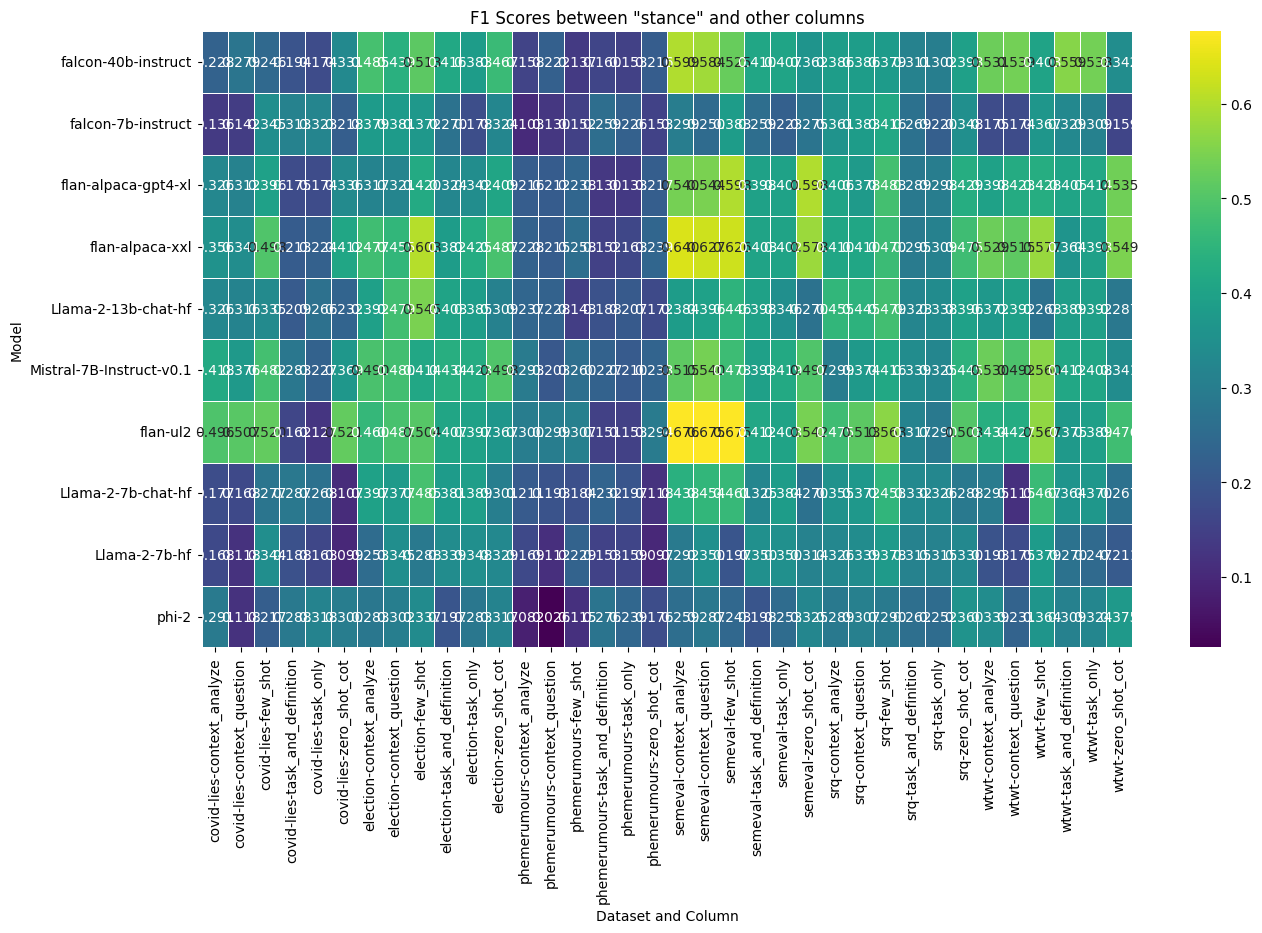

In [42]:
# Print a heatmap
plt.figure(figsize=(15, 8))
f1_scores_df = f1_scores_df.sort_index(axis=1, level=[0, 1])
sns.heatmap(f1_scores_df.astype(float), annot=True, cmap='viridis', fmt=".3f", linewidths=.5)
plt.title('F1 Scores between "stance" and other columns')
plt.xlabel('Dataset and Column')
plt.ylabel('Model')
plt.show()

In [43]:
output_csv_path = "zero-shot_stance_labeling_f1-scores_02JAN2024.csv"
f1_scores_df.to_csv(output_csv_path)

# Analyze the relationship between raw output length and the quality of the produced labels

In [44]:
median_words_df

dataset                  covid-lies                                      \
column                    task_only task_and_definition context_analyze   
falcon-40b-instruct             7.0                 7.0            12.0   
falcon-7b-instruct              1.0                 1.0             1.0   
flan-alpaca-gpt4-xl             1.0                 1.0             1.0   
flan-alpaca-xxl                 1.0                 1.0             1.0   
Llama-2-13b-chat-hf             3.0                24.0            24.0   
Mistral-7B-Instruct-v0.1        1.0                 1.0             1.0   
flan-ul2                        1.0                 1.0             1.0   
Llama-2-7b-chat-hf              1.0                17.0             3.0   
Llama-2-7b-hf                  23.0                22.0            18.0   
phi-2                          18.0                20.0            26.0   

dataset                                                           election  \
column                   context_question few_shot zero_shot_cot task_only   
falcon-40b-instruct                  14.0     11.0          11.0       9.0   
falcon-7b-instruct                    1.0      1.0           1.0       1.0   
flan-alpaca-gpt4-xl                   1.0      1.0           1.0       1.0   
flan-alpaca-xxl                       1.0      1.0           1.0       1.0   
Llama-2-13b-chat-hf                  27.0      1.0          11.0       1.0   
Mistral-7B-Instruct-v0.1              1.0      1.0           1.0       1.0   
flan-ul2                              1.0      1.0           1.0       1.0   
Llama-2-7b-chat-hf                    6.0      1.0           1.0       1.0   
Llama-2-7b-hf                        18.0     30.0          21.0      22.0   
phi-2                                25.0     25.0          26.0       2.0   

dataset                                                                        \
column                   task_and_definition context_analyze context_question   
falcon-40b-instruct                      7.0            12.0             12.0   
falcon-7b-instruct                       1.0             1.0              1.0   
flan-alpaca-gpt4-xl                      1.0             1.0              1.0   
flan-alpaca-xxl                          1.0             1.0              1.0   
Llama-2-13b-chat-hf                     24.0            17.0             30.0   
Mistral-7B-Instruct-v0.1                 1.0             1.0              1.0   
flan-ul2                                 1.0             1.0              1.0   
Llama-2-7b-chat-hf                      17.0            14.0             18.0   
Llama-2-7b-hf                           22.0            16.0             15.0   
phi-2                                   21.0            30.0             29.0   

dataset                   ...             srq                            \
column                    ... context_analyze context_question few_shot   
falcon-40b-instruct       ...             7.0              7.0      5.0   
falcon-7b-instruct        ...             1.0              1.0      1.0   
flan-alpaca-gpt4-xl       ...             1.0              1.0      1.0   
flan-alpaca-xxl           ...             1.0              1.0      1.0   
Llama-2-13b-chat-hf       ...            23.0             19.0      1.0   
Mistral-7B-Instruct-v0.1  ...             1.0              1.0      1.0   
flan-ul2                  ...             1.0              1.0      1.0   
Llama-2-7b-chat-hf        ...             3.0             16.0      1.0   
Llama-2-7b-hf             ...            17.0             17.0     30.0   
phi-2                     ...            26.0             21.0     18.0   

dataset                                     wtwt                      \
column                   zero_shot_cot task_only task_and_definition   
falcon-40b-instruct                7.0       7.0                 7.0   
falcon-7b-instruct                 1.0       1.0                 1.0   


In [71]:
print("Average response length (number of words):")
median_words_df.mean(axis=1)

Average response length (number of words):


falcon-40b-instruct          9.583333
falcon-7b-instruct           1.694444
flan-alpaca-gpt4-xl               1.0
flan-alpaca-xxl                   1.0
Llama-2-13b-chat-hf            13.625
Mistral-7B-Instruct-v0.1          1.0
flan-ul2                          1.0
Llama-2-7b-chat-hf                7.0
Llama-2-7b-hf               20.972222
phi-2                       22.111111
dtype: object

In [48]:
# Calculate the ratio of F1 score to median output length for each dataset and column
ratio_df = f1_scores_df / median_words_df

# Calculate the average ratio for each model
average_ratio_df = pd.DataFrame(index=models, columns=['Average Ratio'])

for model in models:
    model_ratios = ratio_df.loc[model].values.flatten()
    average_ratio = np.nanmean(model_ratios)  # Use np.nanmean to handle NaN values
    average_ratio_df.loc[model, 'Average Ratio'] = average_ratio

# Print or use the average_ratio_df as needed
print("Average Ratios:")
print(average_ratio_df)

Average Ratios:
                         Average Ratio
falcon-40b-instruct            0.04072
falcon-7b-instruct            0.240325
flan-alpaca-gpt4-xl           0.360098
flan-alpaca-xxl               0.408381
Llama-2-13b-chat-hf           0.125355
Mistral-7B-Instruct-v0.1      0.391654
flan-ul2                      0.421369
Llama-2-7b-chat-hf            0.156054
Llama-2-7b-hf                   0.0125
phi-2                         0.016132


In [51]:
# Initialize an empty DataFrame to store the long-format data
long_df = pd.DataFrame(columns=['model', 'dataset', 'prompt_scheme', 'correct', 'num_words'])

# Loop through each dataset and model
for dataset, model in product(datasets, models):
    # Read the CSV file
    file_path = f"results/{dataset}_{model}.csv"
    df = pd.read_csv(file_path)

    # Loop through each column and populate long_df
    for column, raw_column in zip(['task_only_preds_0', 'task_and_definition_preds_0', 'context_analyze_preds_0', 'context_question_preds_0', 'few_shot_preds_0', 'zero_shot_cot_preds_0'],
                                  ['task_only_preds_raw_0', 'task_and_definition_preds_raw_0', 'context_analyze_preds_raw_0', 'context_question_preds_raw_0', 'few_shot_preds_raw_0', 'zero_shot_cot_preds_raw_0']):
        
        prompt_scheme = column.split('_preds')[0]
        
        # Calculate median number of words in raw column
        num_words = df[raw_column].apply(lambda x: len(str(x).strip().split()))
        
        # Create a temporary DataFrame for this prompt scheme
        temp_df = pd.DataFrame({
            'model': model,
            'dataset': dataset,
            'prompt_scheme': prompt_scheme,
            'correct': (df['stance'] == df[column]).astype(int),
            'num_words': num_words
        })
        
        # Concatenate the temporary DataFrame to long_df
        long_df = pd.concat([long_df, temp_df], ignore_index=True)

In [52]:
long_df.shape

(7333740, 5)

In [53]:
long_df.head()

,model,dataset,prompt_scheme,correct,num_words
0,falcon-40b-instruct,covid-lies,task_only,0,7
1,falcon-40b-instruct,covid-lies,task_only,0,7
2,falcon-40b-instruct,covid-lies,task_only,1,7
3,falcon-40b-instruct,covid-lies,task_only,0,17
4,falcon-40b-instruct,covid-lies,task_only,0,17


In [54]:
# Calculate correlation between "correct" and "num_words"
correlation = spearmanr(long_df['correct'], long_df['num_words']).correlation

# Print or use the correlation value
print(f"Correlation between 'correct' and 'num_words': {correlation}")

Correlation between 'correct' and 'num_words': -0.02936565057553501


In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

labels = np.array(long_df['correct']).astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    long_df[['model', 'prompt_scheme', 'num_words']],
    labels,
    test_size=0.2
)

# Create a pipeline for preprocessing and modeling
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', 'passthrough', ['model', 'prompt_scheme']),
        ('num', StandardScaler(), ['num_words'])
    ]
)

model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_rep)


Accuracy: 0.5363995723873495
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.24      0.34    719010
           1       0.53      0.82      0.64    747738

    accuracy                           0.54   1466748
   macro avg       0.55      0.53      0.49   1466748
weighted avg       0.55      0.54      0.49   1466748

